# SETUP

In [0]:
GDRIVE_ROOT = '/content/gdrive'
trainer = 'Vinh'

In [2]:
from google.colab import drive
drive.mount(GDRIVE_ROOT, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!rm -r triplet-cnn-cbir
!git clone https://github.com/VictorNM/triplet-cnn-cbir.git

rm: cannot remove 'triplet-cnn-cbir': No such file or directory
Cloning into 'triplet-cnn-cbir'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 730 (delta 120), reused 156 (delta 82), pack-reused 534
Receiving objects: 100% (730/730), 27.38 MiB | 33.58 MiB/s, done.
Resolving deltas: 100% (411/411), done.


In [1]:
import sys
sys.path.append('../')

import os
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.utils import Sequence

from src import data, models, visualization, utils, callbacks, experiment, database

Using TensorFlow backend.


# RUN

## Create database

In [3]:
# load model
extractor_path = '../models/worked-triplet-loss-0.81_0.87.h5'
extractor = load_model(extractor_path)

Instructions for updating:
Colocations handled automatically by placer.


/home/victor/.local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
input_size = (224, 224)
valid_path = '../data/raw/_2_fan_kettle_600_200_200/valid'

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_path, input_size)

Found 400 images belonging to 2 classes.


In [6]:
x_valid, y_valid = data.convert_generator_to_data(valid_generator)

In [9]:
train_path = '../data/raw/_2_fan_kettle_600_200_200/train'

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_path, input_size)

Found 1200 images belonging to 2 classes.


In [10]:
x_train, y_train = data.convert_generator_to_data(valid_generator, batchs=10)

In [11]:
# concat train and valid set to create DB
x = np.concatenate((x_train, x_valid))
y = np.concatenate((y_train, y_valid))

In [12]:
db = database.NormalDatabase(extractor)
db.create_database(x, y, ['fan', 'kettle'])

Creating database with 720 images...
Database created in 466s


In [13]:
kmeans_db = database.KmeanDatabase(extractor)
kmeans_db.create_database(x, y, ['fan', 'kettle'])

Creating database with 720 images...
Database created in 437s


## Query some results

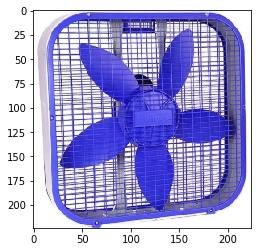

In [48]:
sample = 60
query_image = x_valid[sample]
visualization.show_single_image(query_image)

Querying...
Query finished in 0s


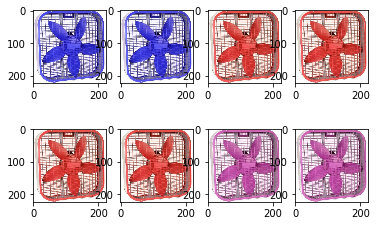

In [49]:
result_images, result_labels = db.query(query_image)
visualization.show_many_images(result_images, row=2, col=4)

Querying...
Query finished in 0s


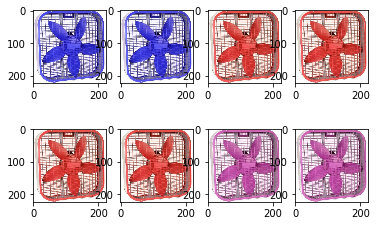

In [50]:
result_images, result_labels = kmeans_db.query(query_image)
visualization.show_many_images(result_images, row=2, col=4)